<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-60/blob/main/Reto_Equipo_60_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


🚀 **Reto-> Entrega 2**: Limpieza, análisis, visualización, label encoding, features importances, train test split, accuracy y precision recall. Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales.

📑 **Asignatura:** Ciencia y analítica de datos

📚 **Grupo:** 60

🧑 **Alumnos:** 
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

👩 **Profesora**: María de la Paz Rico Fernández

📅 Noviembre 18 del 2022

---

---

# 📑 **PARTE 1: LIMPIEZA, ANÁLISIS, VISUALIZACIÓN Y AGRUPAMIENTO DE DATOS**

---



---


## 👣 **Obtener Datos:** En nuestro caso seleccionamos la base de datos de aguas subterraneas;



---


In [65]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import pandas as pd
import numpy as np
import seaborn as sns
import collections
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import matplotlib.pyplot as plt
#import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

In [66]:
db = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-60/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

dfAguasSubterraneas = pd.read_csv(db)
dfAguasSubterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI




---

☝ Antes de iniciar con la limpieza, validamos la relevancia de cada columna para el modelo, clasificándola de acuerdo al tipo de dato y decidiendo la acción que realizaremos con estas en el dataframe. A continuación mostramos la categorización que hicimos para nuestros datos:

---
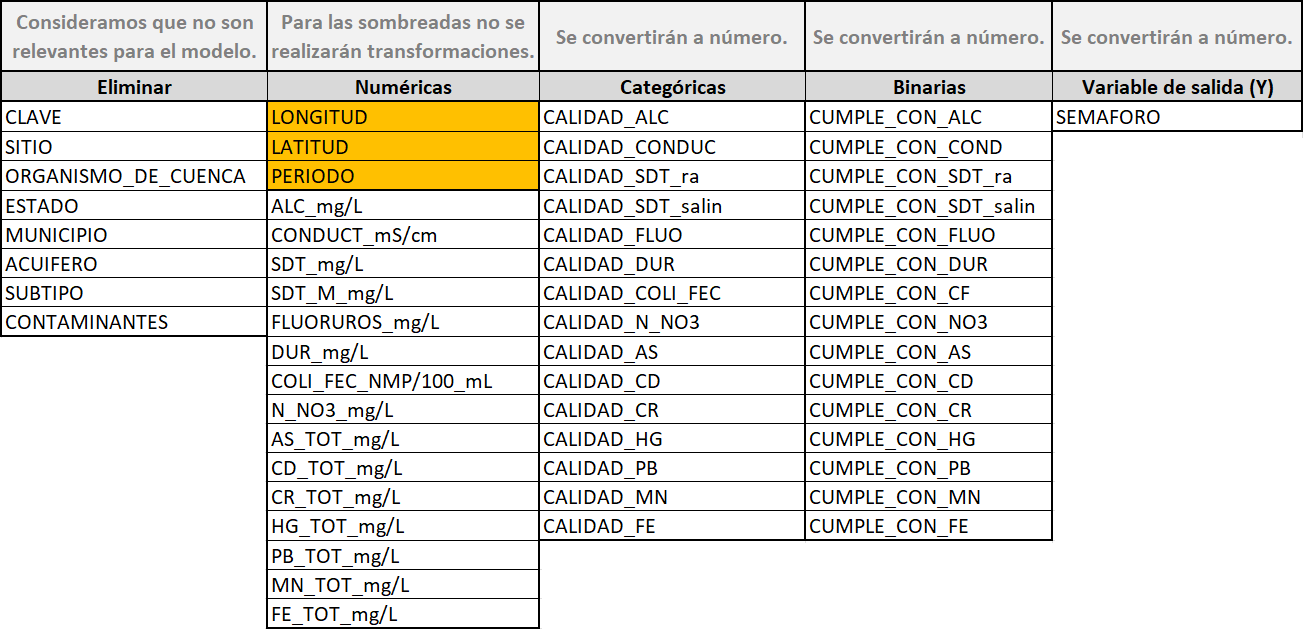

In [67]:
#Creamos nuestras variables conteniendo las columnas clasificadas previamente
ColumnasNumericas=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                    'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

ColumnasCategoricas=['CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 
                     'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']

ColumnasBinarias=['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 
                  'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB',
                  'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

ColumnasEliminar=['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'CONTAMINANTES']

In [68]:
#Inicialmente eliminamos las columnas que no consideramos relevantes para el modelo.
#Cabe aclarar que las columnas de ubicación de la fuente de agua (SITIO, ORGANISMO_DE_CUENCA, ESTADO, MUNICIPIO, ACUIFERO, SUBTIPO)
#no las consideramos relevantes porque con la longitud y latitud ya tendríamos las coordenadas de estos puntos, que es en últimas
#lo que se busca visualizar en el modelo.
dfAguasSubterraneas.drop(columns=ColumnasEliminar, axis=1, inplace=True)
dfAguasSubterraneas.head()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


---


## 👣 **Limpieza, Análisis, Visualización, Agrupamiento:** Realizaremos análisis de las columnas existentes, validación de datos perdidos, imputación de acuerdo al tipo de dato de cada columna, reemplazo de datos, escalamiento de datos si se requiere y visualización a través de gráficas que nos permitan realizar un análisis de la distribución de los datos;



---

In [69]:
#Verificamos si existen datos perdidos en nuestro conjunto
print("¿Existen datos perdidos en el conjunto?")
if(dfAguasSubterraneas.isna().values.any())==True:
  print("Sí")
else:  
  print("No")

¿Existen datos perdidos en el conjunto?
Sí


Text(0, 0.5, 'Número de Registros')

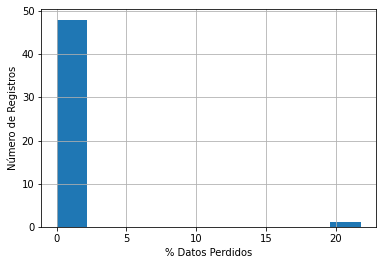

In [70]:
#Graficamos con un histograma el porcentaje de datos perdidos según el número de registros
FilasNA = dfAguasSubterraneas.isna().sum(axis=0) / len(dfAguasSubterraneas.columns)
AS_FilasNA = FilasNA.hist()
AS_FilasNA.set_xlabel('% Datos Perdidos')
AS_FilasNA.set_ylabel('Número de Registros')

---

🔎 Vemos que para la gran mayoría de registros el porcentaje de datos perdidos no llega al **2.5%**, sin embargo, observamos algunos registros con datos perdidos mayores al **20%**. Entraremos a revisar el detalle de cada columna a continuación.

---

In [71]:
#Validamos a continuación cuales son las columnas con datos perdidos para determinar el porcentaje sobre el total.
ColumnasNA=dfAguasSubterraneas.columns[dfAguasSubterraneas.isna().any()].tolist()
print("*************************************************")
print("Las siguientes columnas presentan datos perdidos:")
print("*************************************************")
dfAguasSubterraneas[ColumnasNA].dtypes

*************************************************
Las siguientes columnas presentan datos perdidos:
*************************************************


ALC_mg/L             float64
CALIDAD_ALC           object
CONDUCT_mS/cm        float64
CALIDAD_CONDUC        object
SDT_mg/L             float64
SDT_M_mg/L            object
CALIDAD_SDT_ra        object
CALIDAD_SDT_salin     object
DUR_mg/L              object
CALIDAD_DUR           object
N_NO3_mg/L            object
CALIDAD_N_NO3         object
dtype: object

---

🔎 Existen 3 columnas con tipo de dato numérico y 9 columnas con tipo de dato object que presentan datos perdidos.

---

In [72]:
#Verificamos el porcentaje de datos perdidos por columna.
print("*******************************************************************")
print("El porcentaje de datos perdidos para las columnas identificadas es:")
print("*******************************************************************")
round(dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isnull().any()]].isnull().sum() * 100 / dfAguasSubterraneas.shape[0],2)

*******************************************************************
El porcentaje de datos perdidos para las columnas identificadas es:
*******************************************************************


ALC_mg/L               0.37
CALIDAD_ALC            0.37
CONDUCT_mS/cm          0.56
CALIDAD_CONDUC         0.56
SDT_mg/L             100.00
SDT_M_mg/L             0.19
CALIDAD_SDT_ra         0.19
CALIDAD_SDT_salin      0.19
DUR_mg/L               0.09
CALIDAD_DUR            0.09
N_NO3_mg/L             0.09
CALIDAD_N_NO3          0.09
dtype: float64

---

🔎 Observamos que la columna "**SDT_mg/L**" presenta un **100%** de datos perdidos, por lo cual deberíamos validar la incidencia de esta columna en la clasificación requerida para el modelo según el detalle que nos puedan entregar los responsables de la fuente de información. Para el caso del ejercicio procederemos a eliminarla, ya que al no tener información se hace irrelevante su uso.

---



In [73]:
#Eliminamos la columna que no contiene información "SDT_mg/L" y verificamos nuevamente el porcentaje de datos perdidos por columna.
dfAguasSubterraneas.drop('SDT_mg/L', axis=1, inplace=True)
print("*******************************************************************")
print("El porcentaje de datos perdidos para las columnas identificadas es:")
print("*******************************************************************")
round(dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isnull().any()]].isnull().sum() * 100 / dfAguasSubterraneas.shape[0],2)

*******************************************************************
El porcentaje de datos perdidos para las columnas identificadas es:
*******************************************************************


ALC_mg/L             0.37
CALIDAD_ALC          0.37
CONDUCT_mS/cm        0.56
CALIDAD_CONDUC       0.56
SDT_M_mg/L           0.19
CALIDAD_SDT_ra       0.19
CALIDAD_SDT_salin    0.19
DUR_mg/L             0.09
CALIDAD_DUR          0.09
N_NO3_mg/L           0.09
CALIDAD_N_NO3        0.09
dtype: float64

---

🔎 Observamos que las columnas "**CONDUCT_mS/cm**" y **CALIDAD_CONDUC** presentan un **56%** de datos perdidos, en este caso establecimos como umbral el 60% de datos perdidos para eliminar la columna, ya que asumimos que con más del 60% de datos perdidos la columna pierde relevancia para el modelo.

---


☝ A continuación vamos a obtener los valores no numéricos para aquellas columnas que según la fuente de información deberían ser numéricas, tal como se identificó en la tabla inicial mostrada en el notebook, una vez identificados estos valores no numéricos realizaremos su reemplazo antes de proceder con el cambio del tipo de dato en las columnas.

In [74]:
#Creamos el dataframe "dfnum" solo con las columnas numéricas del conjunto de datos original.
dfnum = dfAguasSubterraneas[ColumnasNumericas]

#Creamos una lista para almacenar todos los valores no numéricos que encontramos en las columnas del nuevo dataframe
list_nn = list()
for col in range(len(dfnum)):
  for fil in dfnum.iloc[col]:
     tem=str(fil)
     if(tem.isnumeric()==False):
        #Asignamos el valor no numérico encontrado a la lista.
        list_nn.append(fil)  

#Convertimos todos los valores de la lista a 'str'
list_nn_final=list(map(str,list_nn))
#Ordenamos la lista en forma descendente para obtener aquellos valores con caracteres no numéricos al comienzo.
list_nn_final.sort(reverse=True)
print("*********************************************************************************************************")
print("Las siguientes son ocurrencias por valor no numérico encontradas en columnas que deberían ser numéricas:")
print("*********************************************************************************************************")
pd.DataFrame(list_nn_final).sort_values([0]).value_counts().head(15)

*********************************************************************************************************
Las siguientes son ocurrencias por valor no numérico encontradas en columnas que deberían ser numéricas:
*********************************************************************************************************


<0.005     1892
<0.003     1066
<0.0005     968
<0.01       815
<1.1        737
<0.0015     545
<0.025      401
<0.2        162
<0.02        65
<20          26
nan          14
0.0006       13
0.0017       13
0.005        11
0.0021       10
dtype: int64

---

🔎 Encontramos múltiples valores no numéricos, por el momento nos centraremos en reemplazar los valores que hacen referencia a rangos, ya que encontramos por ejemplo, **1,892** ocurrencias para **<0.005**. A continuación procederemos ajustando el valor de las celdas al número superior dentro del rango esperado de la siguiente manera:

*   <25 = 25
*   <20 = 20
*   <1.1 = 1.1
*   <0.2 = 0.2
*   <0.025 = 0.025
*   <0.02 = 0.02
*   <0.01 = 0.01
*   <0.005 = 0.005
*   <0.003 = 0.003
*   <0.0015 = 0.0015
*   <0.0005 = 0.0005


Una vez ajustados estos valores procederemos a cambiar el tipo de dato para las columnas numéricas.

---

In [75]:
#Recorremos las columnas numéricas identificadas previamente y ejecutamos el reemplazo de los valores de rango por valores numéricos.
for Columna in dfnum.columns:
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].astype('str')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<25','25')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<20','20')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<1.1','1.1') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.2','0.2') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.025','0.025') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.02','0.02') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.01','0.01') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.005','0.005') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.003','0.003') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.0015','0.0015') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.0005','0.0005') 
  #Cambiamos el tipo de dato a numérico 
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].astype('float')

#Validamos el tipo de dato de las columnas en el dataframe original
dfAguasSubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1068 non-null   float64
 1   LATITUD               1068 non-null   float64
 2   PERIODO               1068 non-null   int64  
 3   ALC_mg/L              1064 non-null   float64
 4   CALIDAD_ALC           1064 non-null   object 
 5   CONDUCT_mS/cm         1062 non-null   float64
 6   CALIDAD_CONDUC        1062 non-null   object 
 7   SDT_M_mg/L            1066 non-null   float64
 8   CALIDAD_SDT_ra        1066 non-null   object 
 9   CALIDAD_SDT_salin     1066 non-null   object 
 10  FLUORUROS_mg/L        1068 non-null   float64
 11  CALIDAD_FLUO          1068 non-null   object 
 12  DUR_mg/L              1067 non-null   float64
 13  CALIDAD_DUR           1067 non-null   object 
 14  COLI_FEC_NMP/100_mL   1068 non-null   float64
 15  CALIDAD_COLI_FEC     



---

☝ Para finalizar con la limpieza inicial, procederemos a cambiar el tipo de dato para las columnas categóricas y las binarias.

---



In [76]:
#Analizamos una muestra de las columnas binarias antes de proceder con la conversión del tipo.
dfAguasSubterraneas.groupby(ColumnasBinarias)[ColumnasBinarias].count()

CUMPLE_CON_ALC  \
CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN CUMPLE_CON_FE                   
ND             SI              SI                SI                   NO              SI             SI            SI             SI            SI            SI            SI            SI            SI            SI                          1   
                                                                      SI              SI             SI            NO             SI            SI            SI            SI            SI            SI            SI                          1   
                                                                                                                   SI             SI            SI            SI            SI            SI            SI            SI                          2   
NO             ND              NO                NO                   SI              NO             SI            SI             SI            SI            SI            SI            SI            NO            NO                          1   
                               SI                SI                   NO              SI             SI            SI             NO            SI            SI            SI            SI            SI            SI                          1   
...                                                                                                                                                                                                                                             ...   
SI             SI              SI                SI                   SI              SI             SI            SI             SI            SI            SI            SI            NO            SI            SI                          3   
                                                                                                                                                                                          SI            NO            NO                         16   
                                                                                                                                                                                                                      SI                         24   
                                                                                                                                                                                                        SI            NO                         27   
                                                                                                                                                                                                                      SI                        427   

                                                                                                                                                                                                                                     CUMPLE_CON_COND  \
CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN CUMPLE_CON_FE                    
ND             SI              SI                SI                   NO              SI             SI            SI             SI            SI            SI            SI            SI            SI            SI                           1   
                                                                      SI              SI             SI            NO             SI            SI            SI            SI            SI            SI            SI                           1   
                         



---

🔎 Como podemos observar, en algunas columnas consideradas binarias ("SI" o "NO") existen celdas con valor **"ND"**, por lo cual debemos proceder ajustando estos valores antes de realizar el cambio del tipo de columna. Vamos a verificar el número de ocurrencias de ND por cada columna binaria y de no ser muy grande, simplemente asumiremos esos valores como **"NO"** en el conjunto de datos.

---



In [77]:
#Creamos el dataframe "dfbin" solo con las columnas binarias del conjunto de datos original.
dfbin = dfAguasSubterraneas[ColumnasBinarias]

#Creamos una lista para almacenar todos los valores "ND" que encontramos en las columnas del nuevo dataframe
list_bi = list()
for col in range(len(dfbin)):
  for fil in dfbin.iloc[col]:
     tem=str(fil)
     if(tem=="ND"):
        #Asignamos el valor "ND" encontrado a la lista.
        list_bi.append(fil)  

#Convertimos todos los valores de la lista a 'str'
list_bi_final=list(map(str,list_bi))
#Ordenamos la lista en forma descendente
list_bi_final.sort(reverse=True)
print("*********************************************************************************************************")
print("Las siguientes son ocurrencias de 'ND' encontradas en columnas que deberían ser binarias:")
print("*********************************************************************************************************")
collections.Counter(list_bi_final)

*********************************************************************************************************
Las siguientes son ocurrencias de 'ND' encontradas en columnas que deberían ser binarias:
*********************************************************************************************************


Counter({'ND': 16})


---

👓 Teniendo en cuenta que son solo **16** celdas con valor **ND**, procederemos a ajustar los registros a **NO** para estas coincidencias.

---


In [78]:
#Recorremos las columnas categóricas identificadas previamente y ajustamos el tipo de dato a "category" en el dataframe original.
for Columna in ColumnasCategoricas:
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].astype('category')

#Recorremos las columnas identificadas como binarias y reemplazamos los valores "SI" y "NO" o "ND" por "1" y "0" respectivamente.
#Posteriormente ajustamos el tipo de dato a "float" en el dataframe original.
for Columna in ColumnasBinarias:
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].str.replace('SI','1')
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].str.replace('NO','0')
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].str.replace('ND','0')

  #Cambiamos el tipo de dato a numérico
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].astype('float')

#Verificamos como quedaron los tipos de dato en el dataframe
dfAguasSubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LONGITUD              1068 non-null   float64 
 1   LATITUD               1068 non-null   float64 
 2   PERIODO               1068 non-null   int64   
 3   ALC_mg/L              1064 non-null   float64 
 4   CALIDAD_ALC           1064 non-null   category
 5   CONDUCT_mS/cm         1062 non-null   float64 
 6   CALIDAD_CONDUC        1062 non-null   category
 7   SDT_M_mg/L            1066 non-null   float64 
 8   CALIDAD_SDT_ra        1066 non-null   category
 9   CALIDAD_SDT_salin     1066 non-null   category
 10  FLUORUROS_mg/L        1068 non-null   float64 
 11  CALIDAD_FLUO          1068 non-null   category
 12  DUR_mg/L              1067 non-null   float64 
 13  CALIDAD_DUR           1067 non-null   category
 14  COLI_FEC_NMP/100_mL   1068 non-null   float64 
 15  CALI

---


**PARA TENER EN CUENTA:** Hasta este punto hemos eliminado las columnas que no tendrán incidencia en nuestro modelo, identificado los datos perdidos, corregidos los valores en las columnas que deben tener datos numéricos y ajustados los tipos de datos para las columnas (numéricas, categóricas y binarias) de acuerdo al análisis inicial de nuestro conjunto.

---

🔎  Como pudimos validar previamente, existen **14** ocurrencias con valores **nan** para las columnas con tipo de dato numérico, validaremos cuales son las columnas que presentan este comportamiento y teniendo en cuenta que son pocos datos con este patrón, procederemos a realizar una imputación con la mediana de las columnas.

---

In [79]:
#Verificamos para las columnas numéricas cuantos valores "na" tiene cada una de estas.
dfnum[dfnum.columns[dfnum.isna().any()]].isna().sum()

ALC_mg/L         4
CONDUCT_mS/cm    6
SDT_M_mg/L       2
DUR_mg/L         1
N_NO3_mg/L       1
dtype: int64

---

📊 Para seleccionar el tipo de dato con el que imputaremos los valores perdidos, validaremos inicialmente la distribución de los datos numéricos, de tal forma que podamos verificar si existe algún sesgo.

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24a2159550>,
      dtype=object)

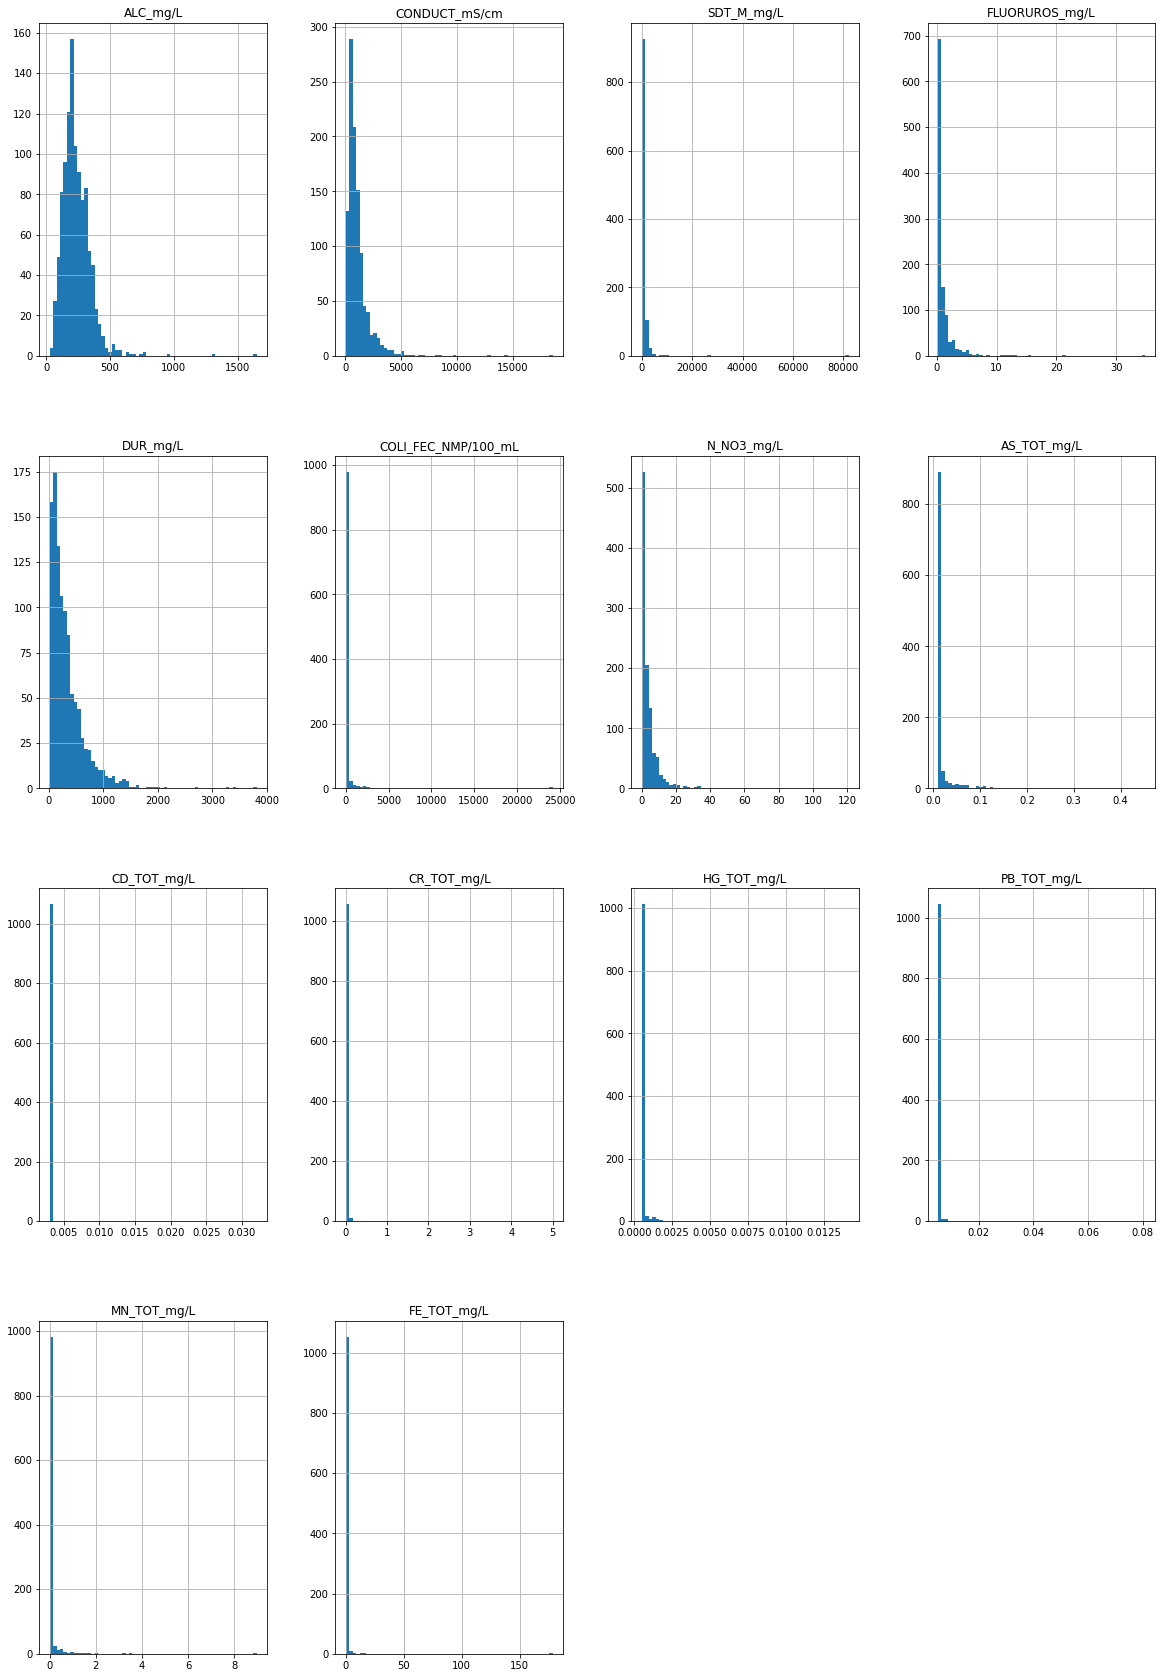

In [80]:
#Actualizamos nuestro dataframe de columnas numéricas con el conjunto actualizado para visualizar la distribución de las columnas.
dfnum = dfAguasSubterraneas[ColumnasNumericas]
#Graficamos la distribución de las columnas numéricas
dfnum.hist(bins = 60, figsize=(20,30))

---

☝ Analizando las gráficas, encontramos que todas las columnas presentan un sesgo hacía la derecha, por lo cual, la **mediana** será nuestra mejor opción para imputar los datos perdidos en las columnas de tipo numérico.

---

In [81]:
#Recorremos las columnas numéricas del dataframe y reemplazamos "nan" con la mediana de la columna
for Columna in dfnum.columns:
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].replace(np.nan, dfAguasSubterraneas[Columna].median())

#Validamos las columnas que continuan con datos perdidos, solo deberían aparecer las que no son tipo numéricas.
dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isna().any()]].isna().sum()

CALIDAD_ALC          4
CALIDAD_CONDUC       6
CALIDAD_SDT_ra       2
CALIDAD_SDT_salin    2
CALIDAD_DUR          1
CALIDAD_N_NO3        1
dtype: int64

---

🔎 Como podemos observar, solo tenemos **16** ocurrencias con valor **nan** para las columnas categóricas, por lo cual, realizaremos la imputación de la moda para los datos perdidos en estas columnas.

---

In [82]:
#Recorremos las columnas categóricas del dataframe y reemplazamos "nan" con la moda de la columna
for Columna in ColumnasCategoricas:
  #Recorremos las columnas numéricas del dataframe y reemplazamos "nan" con la moda de la columna
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].fillna(dfAguasSubterraneas[Columna].mode()[0])

#Validamos las columnas que continuan con datos perdidos, no deberían columnas con datos perdidos.
dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isna().any()]].isna().sum()

Series([], dtype: float64)

---

🔍 Verificamos el porcentaje de datos perdidos por columna para estar seguros que ya superamos esa parte de la limpieza.

---

In [83]:
#Obtenemos el porcentaje de datos perdidos para todas las columnas de nuestro dataframe.
Porcentaje_Perdidos = dfAguasSubterraneas.isna().sum() * 100 / len(dfAguasSubterraneas)
Porcentaje_Perdidos.sort_values(ascending=False)

LONGITUD                0.0
LATITUD                 0.0
PB_TOT_mg/L             0.0
CALIDAD_PB              0.0
MN_TOT_mg/L             0.0
CALIDAD_MN              0.0
FE_TOT_mg/L             0.0
CALIDAD_FE              0.0
SEMAFORO                0.0
CUMPLE_CON_ALC          0.0
CUMPLE_CON_COND         0.0
CUMPLE_CON_SDT_ra       0.0
CUMPLE_CON_SDT_salin    0.0
CUMPLE_CON_FLUO         0.0
CUMPLE_CON_DUR          0.0
CUMPLE_CON_CF           0.0
CUMPLE_CON_NO3          0.0
CUMPLE_CON_AS           0.0
CUMPLE_CON_CD           0.0
CUMPLE_CON_CR           0.0
CUMPLE_CON_HG           0.0
CUMPLE_CON_PB           0.0
CUMPLE_CON_MN           0.0
CALIDAD_HG              0.0
HG_TOT_mg/L             0.0
CALIDAD_CR              0.0
CALIDAD_FLUO            0.0
PERIODO                 0.0
ALC_mg/L                0.0
CALIDAD_ALC             0.0
CONDUCT_mS/cm           0.0
CALIDAD_CONDUC          0.0
SDT_M_mg/L              0.0
CALIDAD_SDT_ra          0.0
CALIDAD_SDT_salin       0.0
FLUORUROS_mg/L      

---

📈 Una vez imputados los datos perdidos en nuestro conjunto de datos, procedemos a verificar si se requiere escalamiento, analizando para ello las estadísticas de nuestras columnas numéricas.

---

In [84]:
#Ejecutamos un "describe" para verificar los valores estadísticos de nuestro conjunto y lo transponemos para un mejor análisis.
dfAguasSubterraneas.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.000000,2020.000000,2020.000000
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.00000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.00000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.02000,0.650932,2.080932,5.200047,121.007813


---


🔎 Analizando las estadísticas para las columnas numéricas observamos que los rangos en algunos atributos difieren de una columna a otra, por ejemplo; en la columna **FLUORUROS_mg/L** tiene un mínimo de **0.2** y un máximo de **34.80**, mientras que la columna **SDT_M_mg/L** presenta un mínimo de **25** y un máximo de **82,170**, mostrando una amplia diferencia en el rango de los atributos, lo cual podría generar problemas al ejecutar el modelo, ya que se podrían priorizar de forma erronea las columnas con mayores pesos en sus atributos numéricos. Por lo anterior, consideramos importante escalar los datos numéricos del conjunto. Pero antes de seleccionar el método para escalar validaremos los outliers existentes en nuestros atributos.

---

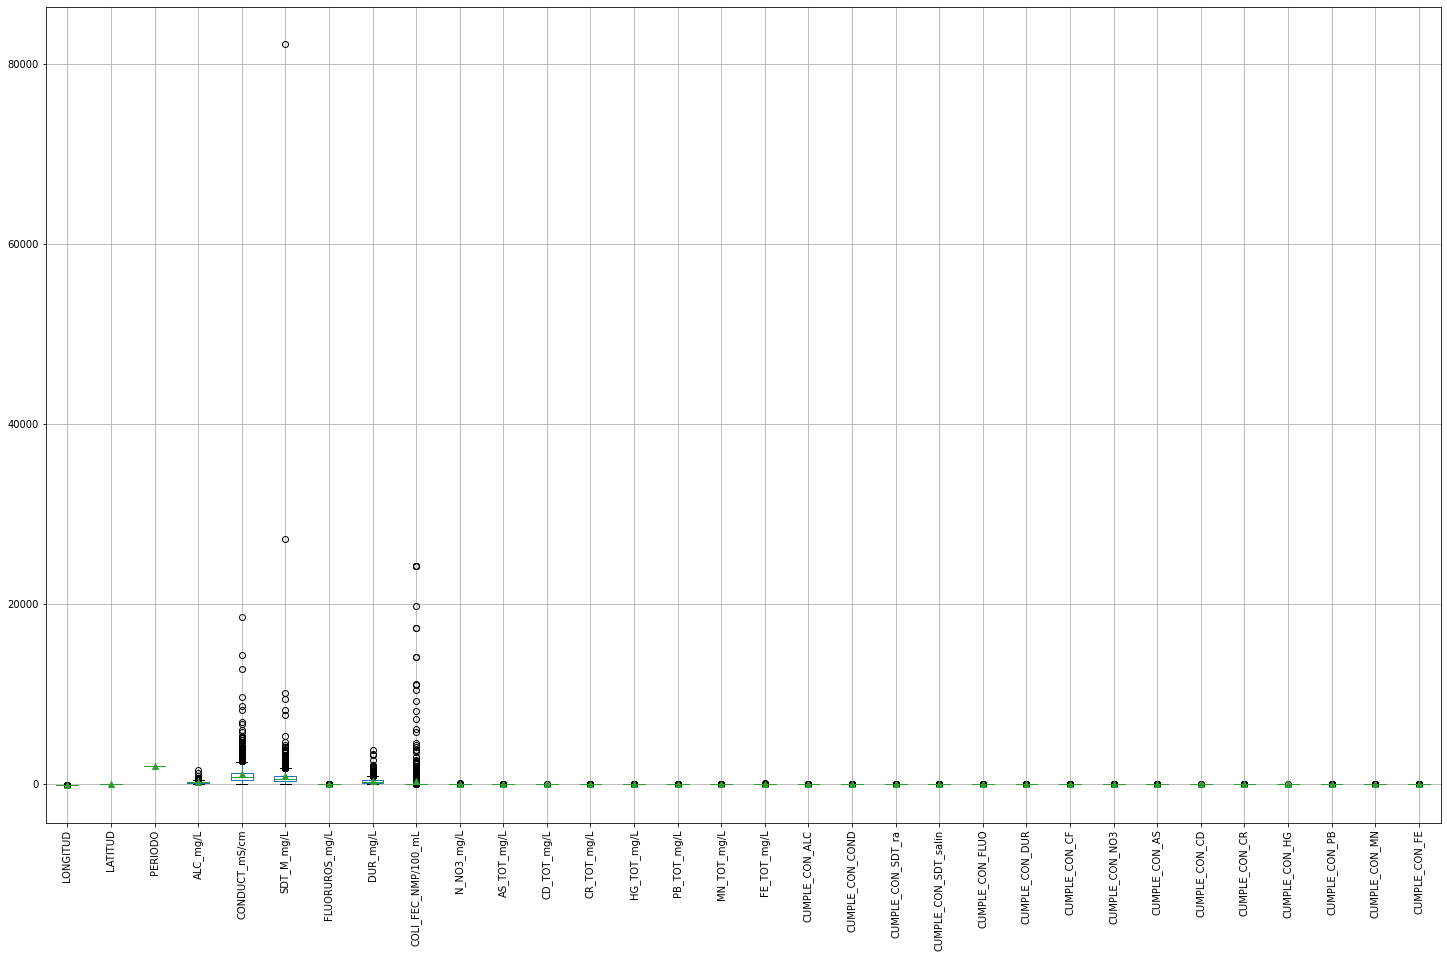

In [85]:
#Generamos nuestro boxplot con los datos del dataframe para revisar los valores atípicos en el conjunto.
Atipicos = dfAguasSubterraneas.boxplot(figsize = (25,15),showmeans = True)
Atipicos.plot()
plt.xticks(rotation=90)
plt.show()

---


🔎 Observamos que en los atributos **COLI_FEC_NMP/100_mL**, **CONDUCT_mS/cm**, **SDT_mg/L**, **DUR_mg/L** y **ALC_mg/L** se presentan muchos valores atípicos, por lo cual no podríamos seleccionar el método **StandardScaler** para escalar los datos, ya que este no garantiza un escalamiento balanceado de los atributos cuando existen outliers en el conjunto de datos, debido a que los valores atípicos impactan el cálculo de la media y la desviación estándar. Teniendo en cuenta lo anterior, utilizaremos el método **MinMaxScaler** para realizar el escalamiento de los datos en el conjunto.

---

☝**NOTA:** Antes de realizar el escalamiento del conjunto, procederemos a ajustar los datos existentes en las columnas categóricas pasándolos de string a categóricos numéricos, haciendo uso de la técnica "**Label Encoding**". Esto con el fin de facilitar la preparación y posterior ejecución de nuestro modelo durante el entrenamiento y afinamiento, ya que como sabemos, a los algoritmos de aprendizaje automático se les facilitará la toma de decisiones cuando trabajan con datos numéricos, gestionando adecuadamente las etiquetas debido a que los números son fácilmente legibles por la maquina.

In [86]:
#Recorremos las columnas categóricas del dataframe para convertir la columna en categórica numérica.
for Columna in ColumnasCategoricas:
  #Recorremos las columnas categóricas del dataframe y reemplazamos el valor tipo str actual por el código numérico de la categoria
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].cat.codes

#Validamos las columnas que continuan con datos perdidos, no deberían columnas con datos perdidos.
dfAguasSubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1068 non-null   float64
 1   LATITUD               1068 non-null   float64
 2   PERIODO               1068 non-null   int64  
 3   ALC_mg/L              1068 non-null   float64
 4   CALIDAD_ALC           1068 non-null   int8   
 5   CONDUCT_mS/cm         1068 non-null   float64
 6   CALIDAD_CONDUC        1068 non-null   int8   
 7   SDT_M_mg/L            1068 non-null   float64
 8   CALIDAD_SDT_ra        1068 non-null   int8   
 9   CALIDAD_SDT_salin     1068 non-null   int8   
 10  FLUORUROS_mg/L        1068 non-null   float64
 11  CALIDAD_FLUO          1068 non-null   int8   
 12  DUR_mg/L              1068 non-null   float64
 13  CALIDAD_DUR           1068 non-null   int8   
 14  COLI_FEC_NMP/100_mL   1068 non-null   float64
 15  CALIDAD_COLI_FEC     

---


👷 Una vez tenemos nuestro conjunto con todas las columnas con tipo de dato numérico, procederemos con el escalamiento haciendo uso del método **MinMaxScaler**.

---

In [87]:
#Aplicamos el escalado a los datos utilizando el MinMaxScaler
Escalador = MinMaxScaler()
dfEscalado = Escalador.fit_transform(dfAguasSubterraneas[ColumnasNumericas])
#dfAguasSubterraneasEscalado=pd.DataFrame(dfEscalado, columns=dfAguasSubterraneas.columns)
pd.DataFrame(dfEscalado, columns=ColumnasNumericas).describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,0.128695,0.071864,0.0,0.084645,0.116356,0.163724,1.0
CONDUCT_mS/cm,1068.0,0.058658,0.067055,0.0,0.024565,0.041270,0.068596,1.0
SDT_M_mg/L,1068.0,0.010597,0.033465,0.0,0.003807,0.006396,0.010845,1.0
FLUORUROS_mg/L,1068.0,0.025304,0.055610,0.0,0.001941,0.008771,0.027161,1.0
DUR_mg/L,1068.0,0.086486,0.094841,0.0,0.026717,0.059444,0.114472,1.0
COLI_FEC_NMP/100_mL,1068.0,0.014647,0.084830,0.0,0.000000,0.000000,0.000502,1.0
N_NO3_mg/L,1068.0,0.035521,0.068945,0.0,0.005215,0.017034,0.042815,1.0
AS_TOT_mg/L,1068.0,0.021750,0.079623,0.0,0.000000,0.000000,0.000000,1.0
CD_TOT_mg/L,1068.0,0.001020,0.030719,0.0,0.000000,0.000000,0.000000,1.0
CR_TOT_mg/L,1068.0,0.001656,0.030889,0.0,0.000000,0.000000,0.000000,1.0


---


🎯 Con esto damos por finalizada nuestra limpieza en el conjunto de datos, ya estaríamos listos para realizar una partición de datos declarando los atributos de entrada en **X** y la variable a predecir en **Y** para entrenar el modelo y realizar las predicciones que se requieran.

---

---

# 📑 **PARTE 2: VALIDACIÓN DEL MODELO**

---


---

👣 Selecciona tus variables independientes X y dependiente Y (semáforo):

---

In [88]:
X = dfAguasSubterraneas.drop('SEMAFORO',axis=1)
y = dfAguasSubterraneas['SEMAFORO']

---

👣 Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [1,2,3]:

---

In [89]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(y)
y=labelEncoder.transform(y)
print("********************************************")
print("Las clases detectadas por la función fueron:")
print("********************************************")
print(labelEncoder.classes_)

********************************************
Las clases detectadas por la función fueron:
********************************************
['Amarillo' 'Rojo' 'Verde']


---

👣 Realiza un análisis general de las features importances a traves de decision trees o random forest:

---

In [90]:
from sklearn.ensemble import RandomForestClassifier
Bosque = RandomForestClassifier(n_estimators=500, random_state=42)
Bosque.fit(X, y)

Columnas_Importantes = pd.DataFrame(index=X.columns, data=Bosque.feature_importances_, columns=["Importancia"])
print("***********************************************************************")
print("Las 10 columnas más importantes para el modelo según Random Forest son:")
print("***********************************************************************")
Columnas_Importantes.sort_values(by="Importancia", ascending=False).head(10)

***********************************************************************
Las 10 columnas más importantes para el modelo según Random Forest son:
***********************************************************************


,Importancia
FLUORUROS_mg/L,0.081994
CALIDAD_FLUO,0.068890
CUMPLE_CON_FLUO,0.064796
DUR_mg/L,0.054926
AS_TOT_mg/L,0.050669
CALIDAD_DUR,0.050066
N_NO3_mg/L,0.042562
CUMPLE_CON_CF,0.042474
COLI_FEC_NMP/100_mL,0.042241
CUMPLE_CON_AS,0.040391


---

✍ Utilizando el clasificador Random Forest podemos observar que la columna "**FLUORUROS_mg/L**" es la más importante para el modelo con un **8%**, seguida de las columnas "**CALIDAD_FLUO**" y "**CUMPLE_CON_FLUO**" con un **6%**, **DUR_mg/L**, **AS_TOT_mg/L** y **CALIDAD_DUR** con un **5%**, y **N_NO3_mg/L**, **CUMPLE_CON_CF**, **COLI_FEC_NMP/100_mL** y **CUMPLE_CON_AS** con un **4%**. Las columnas restantes mantienen un margen de importancia similar y decreciente, llegando hasta un porcentaje del **0%** para la columna "**PERIODO**" que no representa importancia para el modelo. 

---

---

👣 Selecciona las variables de mayor importancia:

---

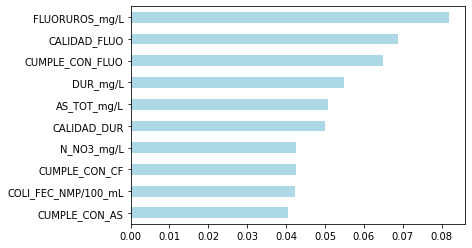

In [91]:
#Graficamos las variables más importantes para el modelo de acuerdo a Random Forest.
(pd.Series(Bosque.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh', color="lightblue").invert_yaxis())  

---

✍ Las columnas que seleccionaremos como relevantes para nuestro modelo según la clasificación "**Features Importance**" realizada por Random Forest son:

*   **FLUORUROS_mg/L**
*   **CALIDAD_FLUO**
*   **CUMPLE_CON_FLUO**
*   **DUR_mg/L**
*   **AS_TOT_mg/L**
*   **CALIDAD_DUR**
*   **N_NO3_mg/L**
*   **CUMPLE_CON_CF**
*   **COLI_FEC_NMP/100_mL**
*   **CUMPLE_CON_AS**

A continuación ajustaremos nuestros atributos independientes para trabajar solo con las características más importantes.

---

In [92]:
#Ajustamos X nuevamente pero solo con los atributos relevantes.
X = dfAguasSubterraneas[['FLUORUROS_mg/L', 'CALIDAD_FLUO', 'CUMPLE_CON_FLUO', 'DUR_mg/L', 'AS_TOT_mg/L', 'CALIDAD_DUR', 'N_NO3_mg/L', 
                        'CUMPLE_CON_CF', 'COLI_FEC_NMP/100_mL', 'CUMPLE_CON_AS']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLUORUROS_mg/L       1068 non-null   float64
 1   CALIDAD_FLUO         1068 non-null   int8   
 2   CUMPLE_CON_FLUO      1068 non-null   float64
 3   DUR_mg/L             1068 non-null   float64
 4   AS_TOT_mg/L          1068 non-null   float64
 5   CALIDAD_DUR          1068 non-null   int8   
 6   N_NO3_mg/L           1068 non-null   float64
 7   CUMPLE_CON_CF        1068 non-null   float64
 8   COLI_FEC_NMP/100_mL  1068 non-null   float64
 9   CUMPLE_CON_AS        1068 non-null   float64
dtypes: float64(8), int8(2)
memory usage: 69.0 KB


---

👣 Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split):

---

In [93]:
#Antes de realizar la división de los datos validamos la proporción de las clases para los datos originales.
print("*******************************************************")
print("La proporción de las clases en el conjunto original es:")
print("*******************************************************")
round((pd.DataFrame(y).value_counts()/len(pd.DataFrame(y)))*100,2)

*******************************************************
La proporción de las clases en el conjunto original es:
*******************************************************


2    40.64
1    36.24
0    23.13
dtype: float64

---

🔎 La proporción de las clases en el conjunto de datos original se encuentra de la siguiente manera:

🟡 23.13% (0)
🔴 36.24% (1)
🟢 40.64% (2)

A continuación procederemos a particionar los datos del conjunto, buscando mantener el balanceo en las clases.

---

In [94]:
#Importamos la librería y realizamos la partición de los datos utilizando "stratify" para el balanceo de las clases.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=.20)

#Después de realizar la división de los datos validamos la proporción de las clases para los datos de entrenamiento.
print("**************************************************************")
print("La proporción de las clases en el conjunto de entrenamiento es:")
print("**************************************************************")
round((pd.DataFrame(y_train).value_counts()/len(pd.DataFrame(y_train)))*100,2)

**************************************************************
La proporción de las clases en el conjunto de entrenamiento es:
**************************************************************


2    40.63
1    36.18
0    23.19
dtype: float64

---

🔎 Confirmamos que después de la partición se mantuvo el balanceo de las clases en el conjunto de entrenamiento y por ende en el conjunto de pruebas:

🟡 23.19% (0)
🔴 36.18% (1)
🟢 40.63% (2)

---

---

👣 Explora que clasificador es el más optimo, ejemplo:

*   Decision trees
*   Random Forest

---

---

☝ Realizaremos la clasificación utilizando inicialmente un modelo basado en árbol de decisión (**Decision Tree**).

---

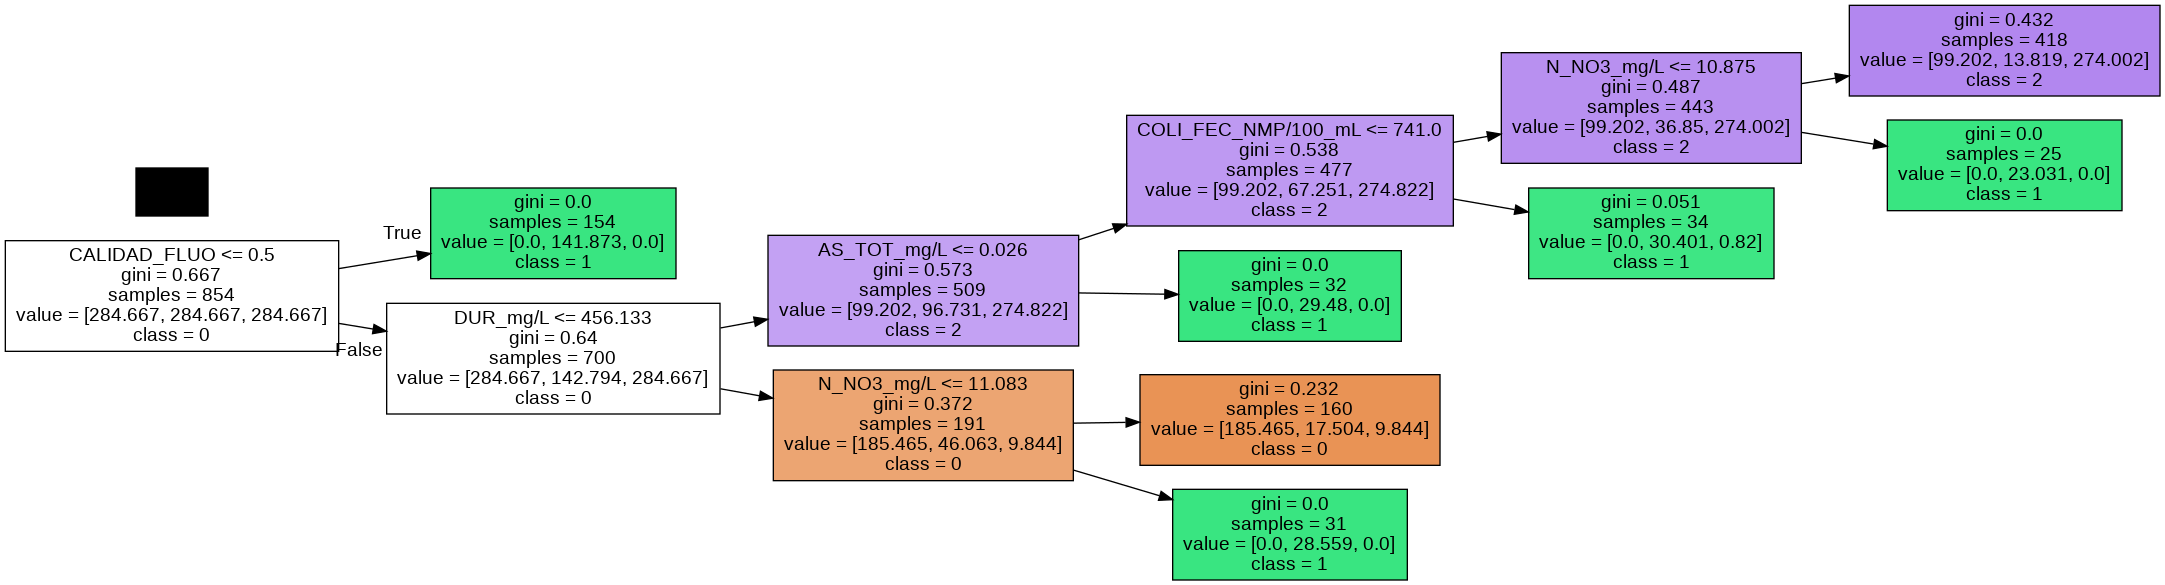

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus 
from IPython.display import Image

Arbol = DecisionTreeClassifier(ccp_alpha=0.03,class_weight= 'balanced',criterion='gini',
                                   max_depth=5, min_samples_split=2)
Arbol.fit(X_train, np.ravel(y_train))

Arbol_Pred=Arbol.predict(X_test)

dot_data = tree.export_graphviz(decision_tree=Arbol.fit(X_train,np.ravel(y_train)), 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(X_train).columns.values),
                                class_names=['0','1','2'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

---

☝ Realizaremos la clasificación utilizando ahora un modelo basado en bosque aleatorio (**Random Forest**).

---

In [96]:
Bosque = RandomForestClassifier(n_estimators=500, random_state=42)
Bosque.fit(X_train, y_train)
Bosque_Pred=Bosque.predict(X_test)

---

👣 Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall:

---

🔢 **Score de Árbol de Decisión**

In [100]:
#Score Decision Tree
print("************************************************************************")
print("El score para nuestro modelo utilizando 'Decision Tree' es el siguiente:")
print("************************************************************************")
round(Arbol.score(X_test, y_test),2)

************************************************************************
El score para nuestro modelo utilizando 'Decision Tree' es el siguiente:
************************************************************************


0.87

---


🧾 **Reporte de Clasificación para el Árbol de Decisión**

In [101]:
print("*************************************************************************")
print("El reporte de clasificación para nuestro modelo con árbol de decisión es:")
print("*************************************************************************")
print(classification_report(y_test, Arbol_Pred, target_names=['0','1','2']))

*************************************************************************
El reporte de clasificación para nuestro modelo con árbol de decisión es:
*************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        49
           1       1.00      0.88      0.94        78
           2       0.81      0.95      0.88        87

    accuracy                           0.87       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.88      0.87      0.87       214



---


📈 **Gráfica de Precisión Recall para el Árbol de Decisión**

In [49]:
#Arbol_Score = Arbol.predict_proba(X_test)

---


🔢 **Score de Bosque Aleatorio**


---

In [105]:
#Score Random Forest
print("************************************************************************")
print("El score para nuestro modelo utilizando 'Random Forest' es el siguiente:")
print("************************************************************************")
round(Bosque.score(X_test, y_test),2)

************************************************************************
El score para nuestro modelo utilizando 'Random Forest' es el siguiente:
************************************************************************


0.89

---


🧾 **Reporte de Clasificación para el Bosque Aleatorio**

In [106]:
print("************************************************************************")
print("El reporte de clasificación para nuestro modelo con bosque aleatorio es:")
print("************************************************************************")
print(classification_report(y_test, Bosque_Pred, target_names=['0','1','2']))

************************************************************************
El reporte de clasificación para nuestro modelo con bosque aleatorio es:
************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        49
           1       0.99      0.95      0.97        78
           2       0.84      0.93      0.88        87

    accuracy                           0.89       214
   macro avg       0.89      0.86      0.87       214
weighted avg       0.89      0.89      0.89       214



---


📈 **Gráfica de Precisión Recall para el Bosque Aleatorio**

---

👣 Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión:

---

🔀 **Matriz de Confusión para el Árbol de Decisión**

In [104]:
print("********************************************************************")
print("La matriz de confusión para nuestro modelo con árbol de decisión es:")
print("********************************************************************")
print(confusion_matrix(y_test, Arbol_Pred))

********************************************************************
La matriz de confusión para nuestro modelo con árbol de decisión es:
********************************************************************
[[34  0 15]
 [ 5 69  4]
 [ 4  0 83]]


---


Graficamos nuestra matriz de confusión para el árbol de decisión:

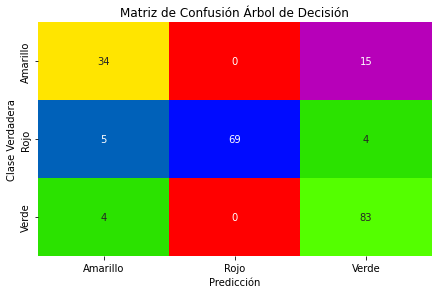

In [123]:
#Asignamos a la variable "Matriz_Arbol" la matriz de confusión para el árbol de decisión.
Matrix_Arbol = confusion_matrix(y_test, Arbol_Pred)

#Creamos una lista con las clases posibles
Clases = ['Amarillo','Rojo','Verde']

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(Matrix_Arbol, index=Clases, columns=Clases)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="prism")
plt.title("Matriz de Confusión Árbol de Decisión"), plt.tight_layout()
plt.ylabel("Clase Verdadera"), plt.xlabel("Predicción")
plt.show()

---


🔀 **Matriz de Confusión para el Bosque Aleatorio**

In [107]:
print("*******************************************************************")
print("La matriz de confusión para nuestro modelo con bosque aleatorio es:")
print("*******************************************************************")
print(confusion_matrix(y_test, Bosque_Pred))

*******************************************************************
La matriz de confusión para nuestro modelo con bosque aleatorio es:
*******************************************************************
[[35  1 13]
 [ 1 74  3]
 [ 6  0 81]]


---


Graficamos nuestra matriz de confusión para el bosque aleatorio:

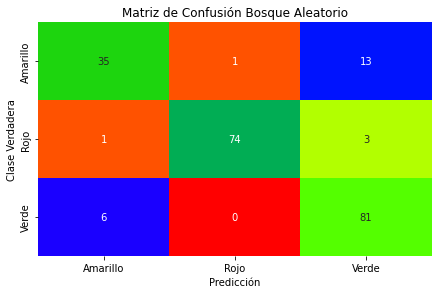

In [124]:
#Asignamos a la variable "Matriz_Arbol" la matriz de confusión para el árbol de decisión.
Matrix_Bosque = confusion_matrix(y_test, Bosque_Pred)

#Creamos una lista con las clases posibles
Clases = ['Amarillo','Rojo','Verde']

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(Matrix_Bosque, index=Clases, columns=Clases)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="prism")
plt.title("Matriz de Confusión Bosque Aleatorio"), plt.tight_layout()
plt.ylabel("Clase Verdadera"), plt.xlabel("Predicción")
plt.show()

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.